In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [6]:
# Load the data
df=pd.read_csv('D:\health_data.csv')
df.head()
df.columns = [col.split('. ')[-1].strip().lower().replace(' ', '_') for col in df.columns]


In [8]:
# Preview data
print("First 5 rows:")
print(df.head())
print("\nData shape:", df.shape)

First 5 rows:
  what_is_your_age_group? what_is_your_gender? what_is_your_occupation?  \
0                   31-50               Female                Homemaker   
1            51 and above               Female                Homemaker   
2            51 and above                 Male              Private job   
3                   31-50               Female                Homemaker   
4                   31-50               Female                Homemaker   

  what_is_your_highest_level_of_education?  \
0                           Primary school   
1                           Primary school   
2                         Secondary school   
3                         Higher secondary   
4                         Secondary school   

  is_there_a_healthcare_facility_in_your_village?  \
0                  Yes, a private hospital/clinic   
1               Yes, a government hospital/clinic   
2   No, we have to travel to another village/city   
3               Yes, a government hospital/cli

# 1. Demographic Analysis


=== Demographic Analysis ===


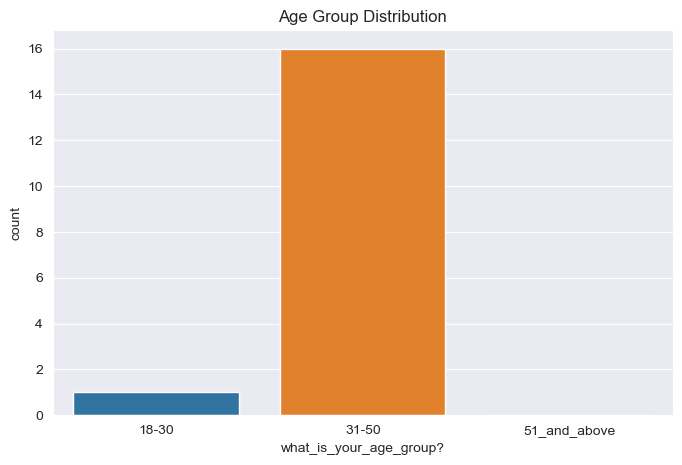

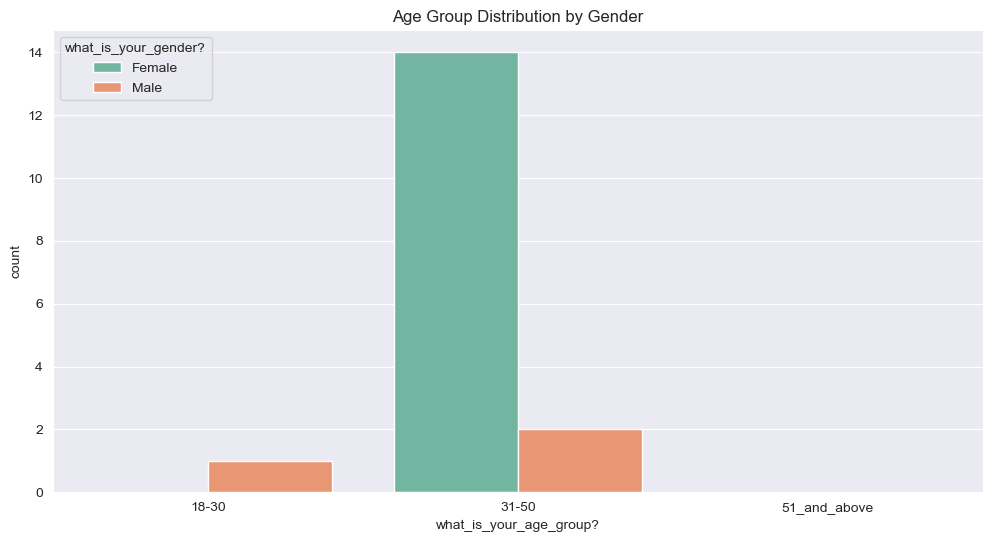

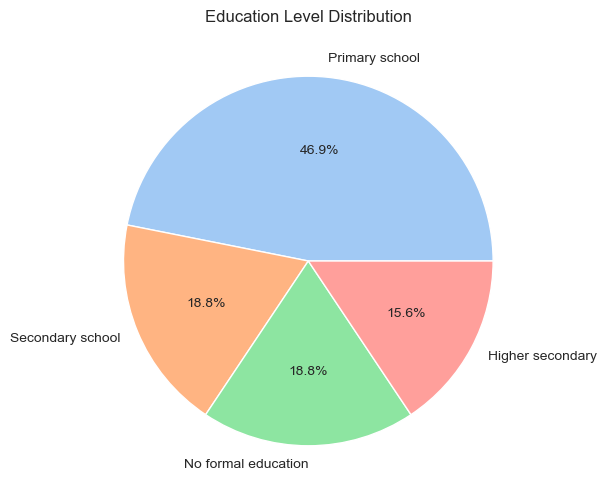

In [26]:
print("\n=== Demographic Analysis ===")

# Age distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='what_is_your_age_group?', order=['18-30', '31-50', '51_and_above'])
plt.title("Age Group Distribution")
plt.savefig('age_distribution.png')
plt.show()

# Age vs. Gender Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='what_is_your_age_group?', hue='what_is_your_gender?',
             order=['18-30', '31-50', '51_and_above'], palette='Set2')
plt.title("Age Group Distribution by Gender")
plt.savefig('age_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Education Level Distribution
plt.figure(figsize=(10, 6))
df['what_is_your_highest_level_of_education?'].value_counts().plot.pie(autopct='%1.1f%%',
                                                                      colors=sns.color_palette('pastel'))
plt.title("Education Level Distribution")
plt.ylabel('')
plt.savefig('education_pie.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

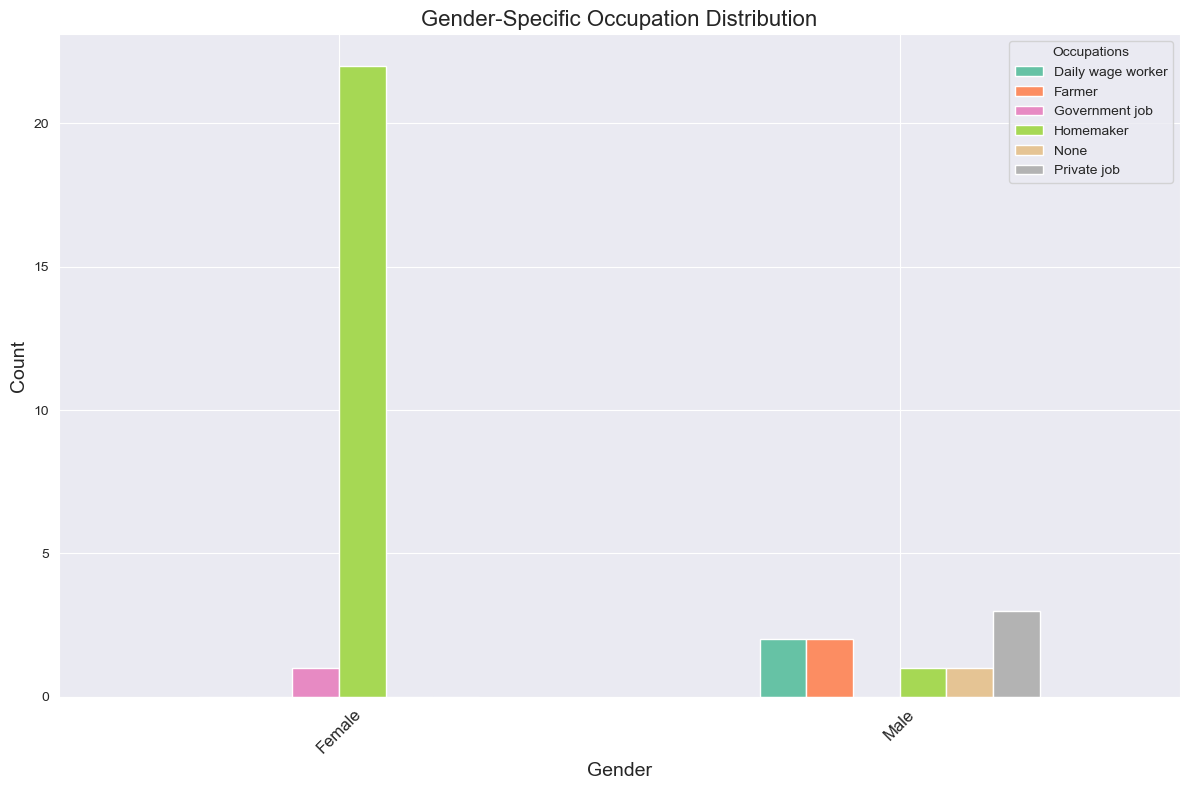

In [28]:
occupation_by_gender = df.groupby(['what_is_your_gender?', 'what_is_your_occupation?']).size().unstack()

# Plotting the grouped chart
plt.figure(figsize=(12, 8))
occupation_by_gender.plot(kind='bar', figsize=(12, 8), colormap='Set2')

plt.title('Gender-Specific Occupation Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Occupations', loc='upper right', fontsize=10)
plt.tight_layout()

# Save and show the plot
plt.savefig('gender_specific_occupation.png', dpi=300)
plt.show()


# 2. Healthcare Access Analysis


=== Healthcare Access ===


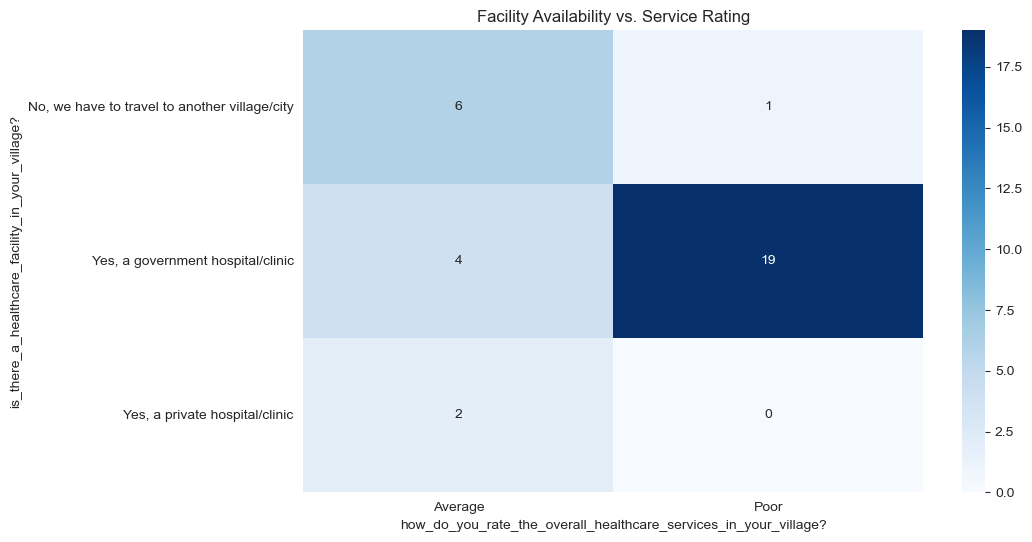

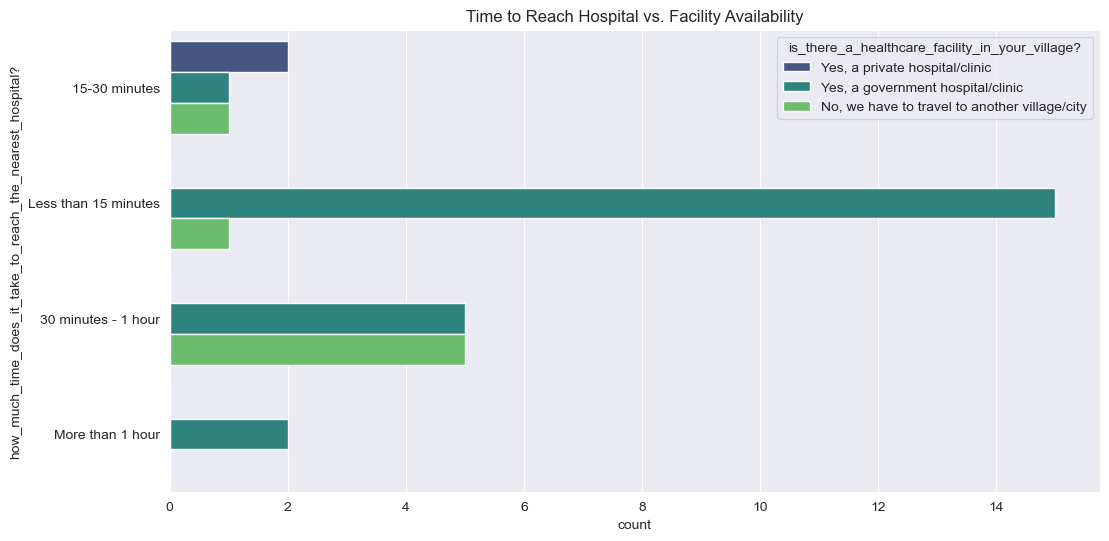

In [29]:
print("\n=== Healthcare Access ===")

# Facility Availability vs. Service Rating
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['is_there_a_healthcare_facility_in_your_village?'],
                       df['how_do_you_rate_the_overall_healthcare_services_in_your_village?']),
           annot=True, cmap='Blues', fmt='d')
plt.title("Facility Availability vs. Service Rating")
plt.savefig('facility_rating_heatmap.png')
plt.show()

# Time Taken to Reach Hospital by Facility Presence
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='how_much_time_does_it_take_to_reach_the_nearest_hospital?',
             hue='is_there_a_healthcare_facility_in_your_village?', palette='viridis')
plt.title("Time to Reach Hospital vs. Facility Availability")
plt.savefig('time_vs_facility.png')
plt.show()


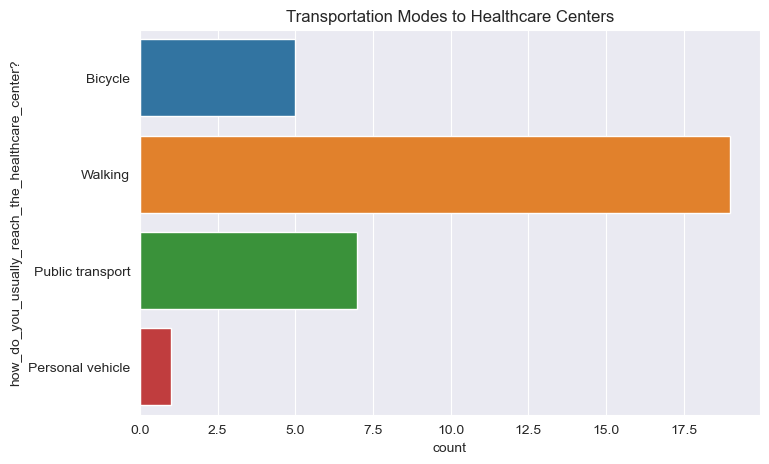

In [13]:
# Transportation modes
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='how_do_you_usually_reach_the_healthcare_center?')
plt.title("Transportation Modes to Healthcare Centers")
plt.savefig('transportation_modes.png')
plt.show()

# 3. Service Availability Analysis


=== Service Availability ===


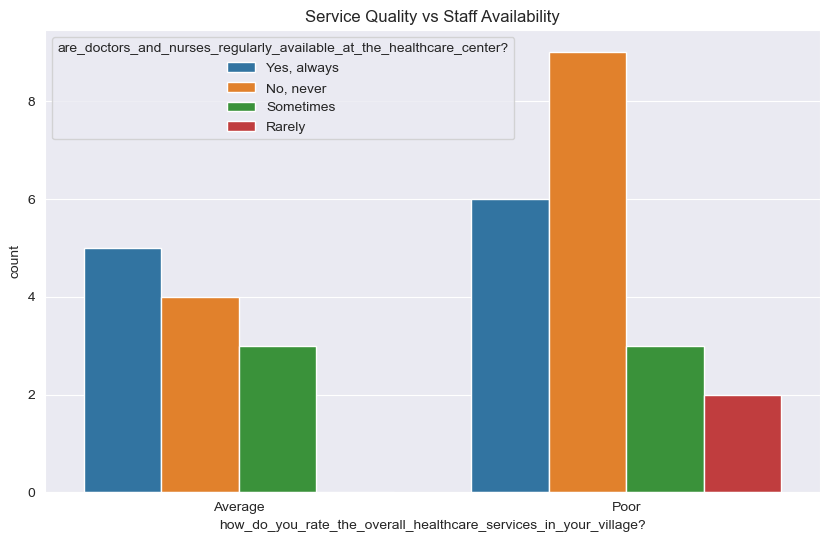

In [17]:
print("\n=== Service Availability ===")

# Doctor availability vs facility rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='how_do_you_rate_the_overall_healthcare_services_in_your_village?',
             hue='are_doctors_and_nurses_regularly_available_at_the_healthcare_center?')
plt.title("Service Quality vs Staff Availability")
plt.savefig('service_quality_vs_staff.png')
plt.show()

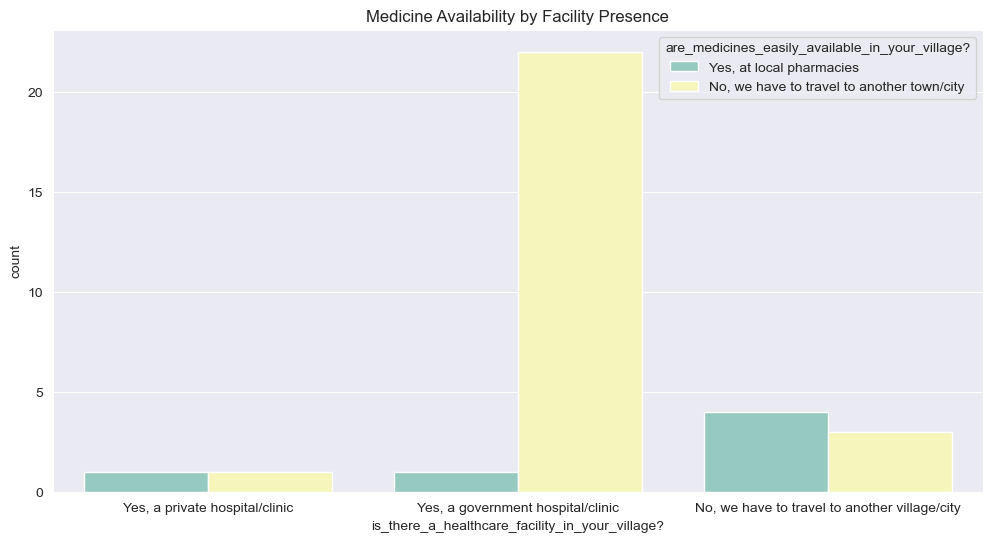

In [30]:
# Medicine Availability by Facility Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='is_there_a_healthcare_facility_in_your_village?',
             hue='are_medicines_easily_available_in_your_village?', palette='Set3')
plt.title("Medicine Availability by Facility Presence")
plt.savefig('medicine_availability.png')
plt.show()


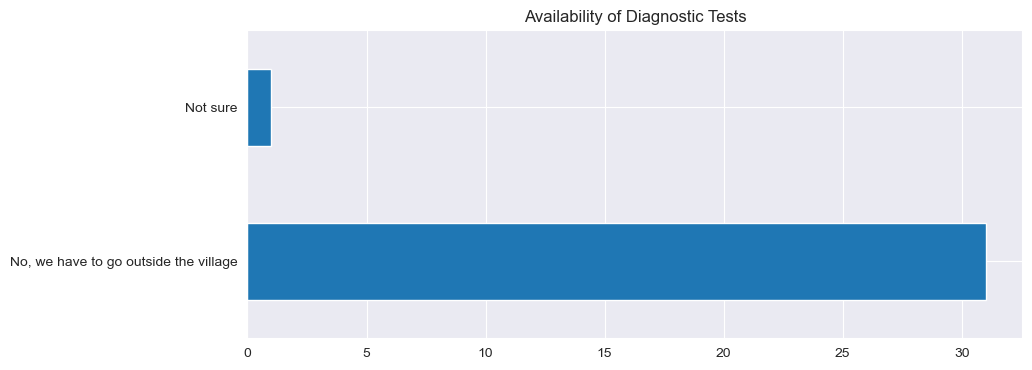

In [31]:
# Diagnostic Test Availability (Horizontal Bar)
plt.figure(figsize=(10, 4))
df['are_diagnostic_tests_(blood_tests,_x-rays,_etc.)_available_in_your_village?'].value_counts().plot.barh()
plt.title("Availability of Diagnostic Tests")
plt.savefig('diagnostic_tests.png')
plt.show()

# 4. Government Scheme Analysis


=== Government Schemes ===


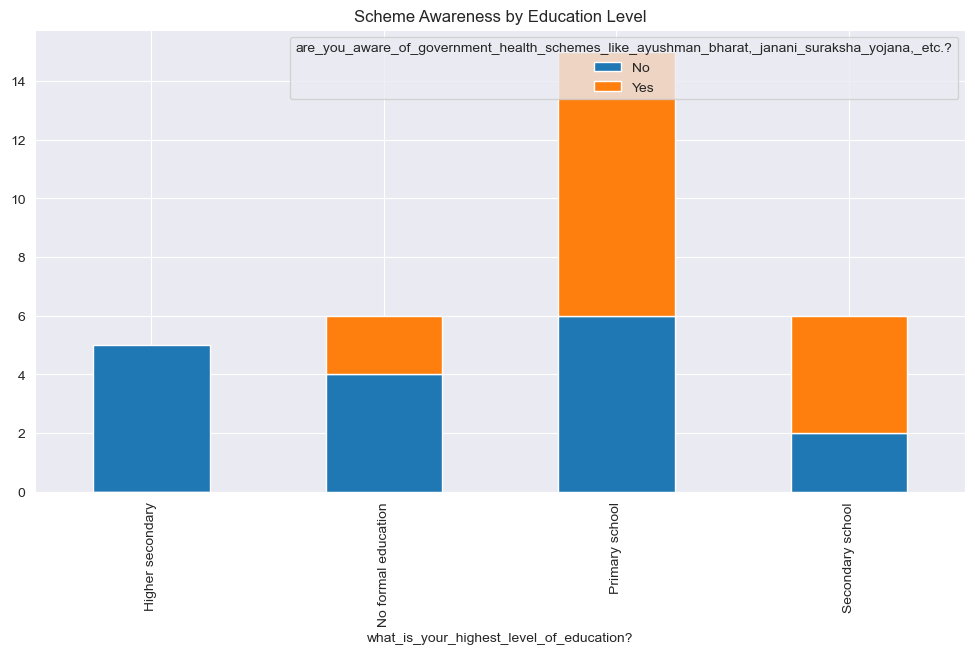

In [32]:
print("\n=== Government Schemes ===")

# Scheme Awareness vs. Education Level (Stacked Bar)
scheme_edu = pd.crosstab(df['what_is_your_highest_level_of_education?'],
                        df['are_you_aware_of_government_health_schemes_like_ayushman_bharat,_janani_suraksha_yojana,_etc.?'])
scheme_edu.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Scheme Awareness by Education Level")
plt.savefig('scheme_awareness_education.png')
plt.show()


# 5. Health Issues & Challenges Analysis


Top Health Issues (Q15):
[('Fever & infections', 32), ('High blood pressure', 27), ('Malaria/Dengue', 25), ('Diabetes', 10), ('Malnutrition', 9)]

Biggest Challenges (Q21):
[('Distance from healthcare centers', 32), ('Shortage of medicines', 27), ('Lack of doctors and medical staff', 17), ('Poor sanitation and hygiene', 11)]


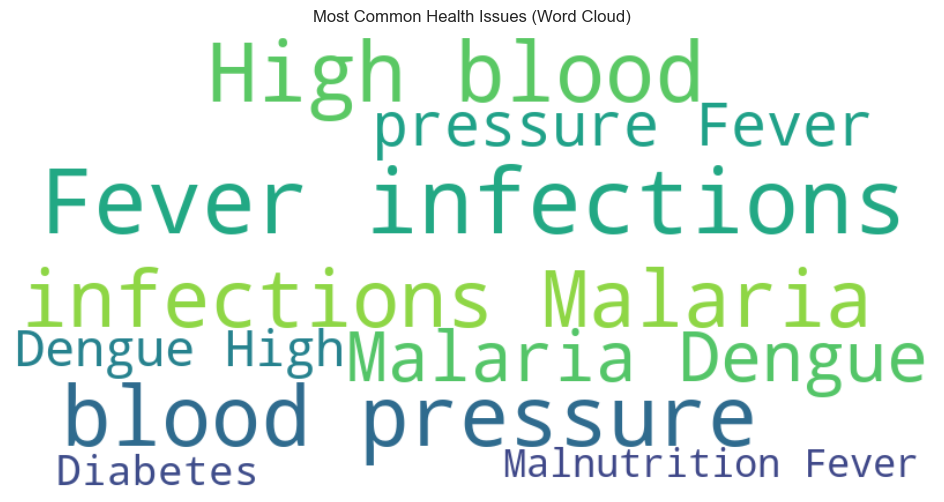

In [38]:
# Analyze multi-select responses (Q15, Q21, Q23)
def analyze_multiselect(column):
    all_answers = []
    for answers in df[column].dropna():
        all_answers.extend([x.strip() for x in answers.split(',')])
    return Counter(all_answers)

print("\nTop Health Issues (Q15):")
print(analyze_multiselect('what_are_the_most_common_health_problems_faced_in_your_village?_(select_multiple)').most_common(5))

print("\nBiggest Challenges (Q21):")
print(analyze_multiselect('what_are_the_biggest_challenges_in_accessing_healthcare_in_your_village?_(select_multiple)').most_common(5))
# Word Cloud for Health Issues
all_health_issues = ' '.join(df['what_are_the_most_common_health_problems_faced_in_your_village?_(select_multiple)'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_health_issues)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Health Issues (Word Cloud)")
plt.savefig('health_issues_wordcloud.png')
plt.show()

# 6. Advanced Analysis (Correlations)


Education Level vs Scheme Awareness:
are_you_aware_of_government_health_schemes_like_ayushman_bharat,_janani_suraksha_yojana,_etc.?  No  \
what_is_your_highest_level_of_education?                                                             
Higher secondary                                                                                 5   
No formal education                                                                              4   
Primary school                                                                                   6   
Secondary school                                                                                 2   

are_you_aware_of_government_health_schemes_like_ayushman_bharat,_janani_suraksha_yojana,_etc.?  Yes  
what_is_your_highest_level_of_education?                                                             
Higher secondary                                                                                  0  
No formal education                        

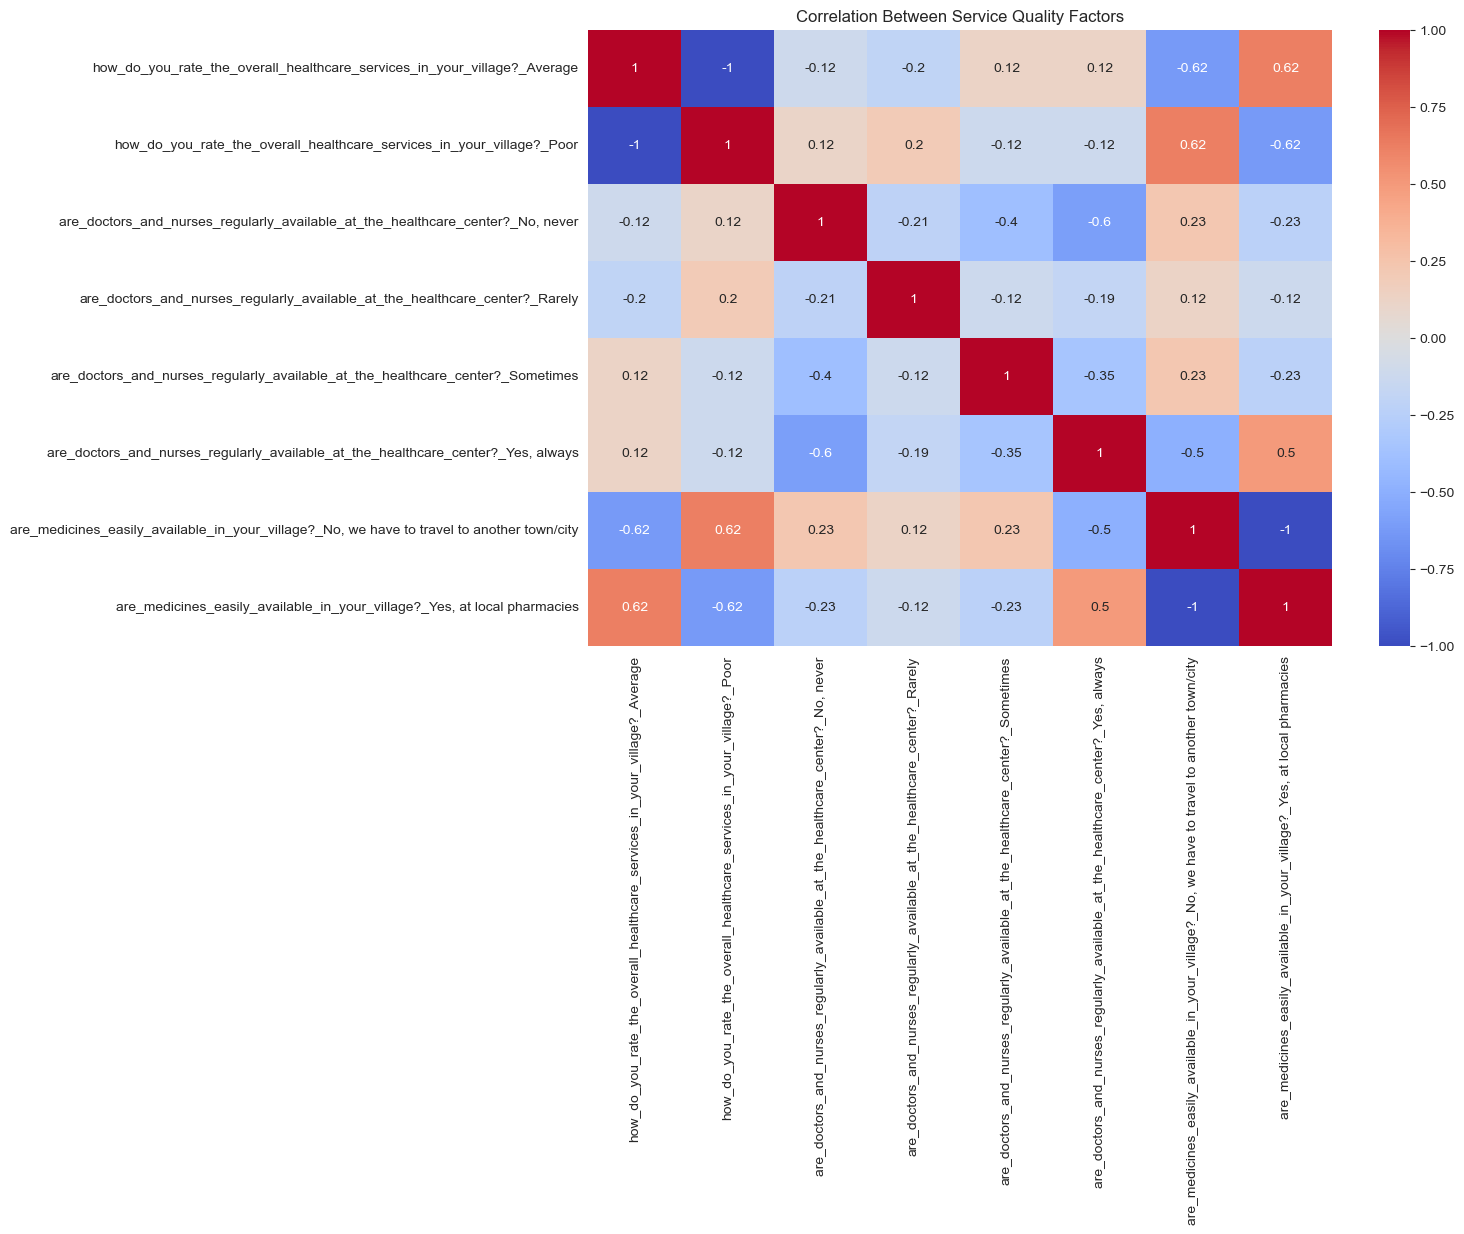

In [41]:
# Education vs scheme awareness
education_scheme = pd.crosstab(
    df['what_is_your_highest_level_of_education?'],
    df['are_you_aware_of_government_health_schemes_like_ayushman_bharat,_janani_suraksha_yojana,_etc.?']
)
print("\nEducation Level vs Scheme Awareness:")
print(education_scheme)
corr_df = pd.get_dummies(df[['how_do_you_rate_the_overall_healthcare_services_in_your_village?',
                            'are_doctors_and_nurses_regularly_available_at_the_healthcare_center?',
                            'are_medicines_easily_available_in_your_village?']])
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Service Quality Factors")
plt.savefig('correlation_heatmap.png')
plt.show()


In [23]:
# Facility presence vs service rating
facility_rating = pd.crosstab(
    df['is_there_a_healthcare_facility_in_your_village?'],
    df['how_do_you_rate_the_overall_healthcare_services_in_your_village?']
)
print("\nFacility Presence vs Service Rating:")
print(facility_rating)



Facility Presence vs Service Rating:
how_do_you_rate_the_overall_healthcare_services_in_your_village?  Average  \
is_there_a_healthcare_facility_in_your_village?                             
No, we have to travel to another village/city                           6   
Yes, a government hospital/clinic                                       4   
Yes, a private hospital/clinic                                          2   

how_do_you_rate_the_overall_healthcare_services_in_your_village?  Poor  
is_there_a_healthcare_facility_in_your_village?                         
No, we have to travel to another village/city                        1  
Yes, a government hospital/clinic                                   19  
Yes, a private hospital/clinic                                       0  


# 7. Vaccination & Maternal Care Analysis

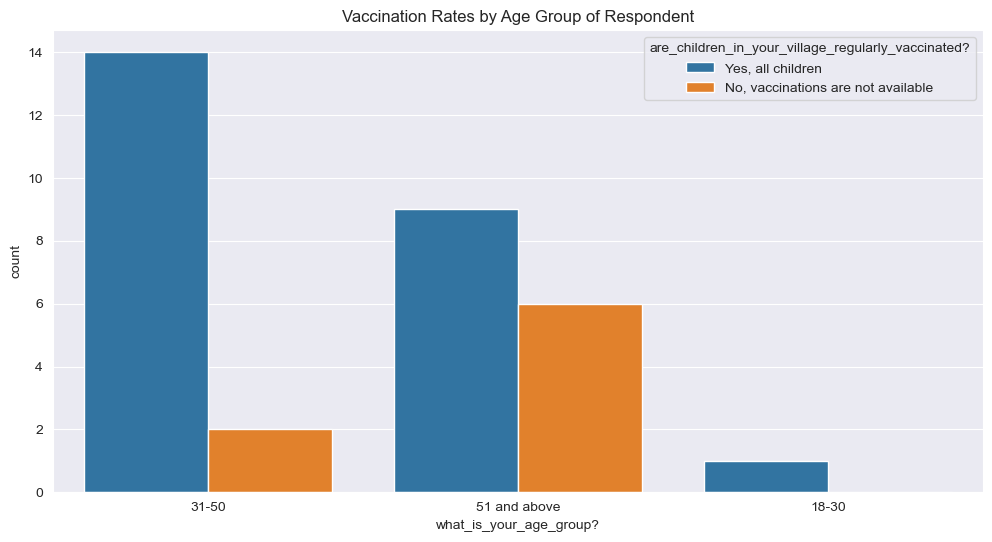

In [42]:
# Vaccination Status by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='what_is_your_age_group?', hue='are_children_in_your_village_regularly_vaccinated?',
             palette='tab10')
plt.title("Vaccination Rates by Age Group of Respondent")
plt.savefig('vaccination_age.png')
plt.show()

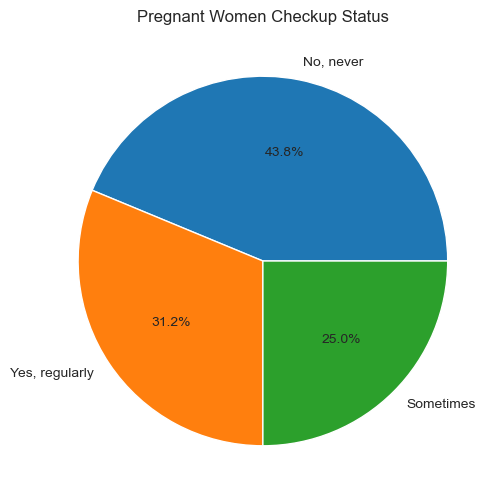

In [43]:
# Maternal Checkups
plt.figure(figsize=(10, 6))
df['are_pregnant_women_in_your_village_receiving_proper_medical_checkups?'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pregnant Women Checkup Status")
plt.ylabel('')
plt.savefig('maternal_checkups.png')
plt.show()